In [1]:
include("./trimer.jl")
#using .reaction_network
#import reaction_networkb

4-element Vector{Pair{Symbol, Float64}}:
 :k1 => 50.0
 :k2 => 0.0002
 :k3 => 50.0
 :k4 => 4.24e-12

99.91913509863541
99.91913509863541


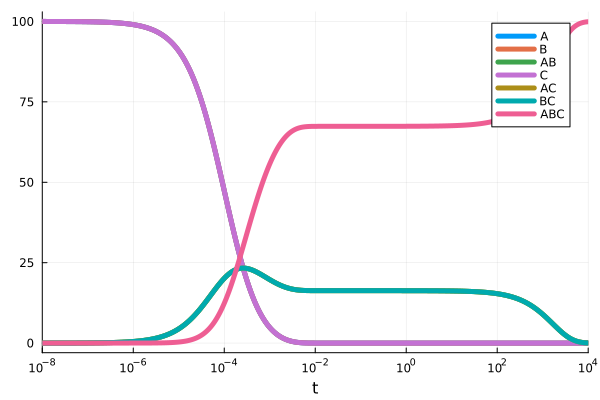

In [ ]:
#Run simulation
ode = ODEProblem(trimer, u0, (.00000001,10000), params)#; jac = true) #Using the jacobian
sol = solve(ode,Rodas5P())
println(sol.u[end][end])
println(Array(sol)[end][end])
plot(sol,xaxis=:log; lw = 5)

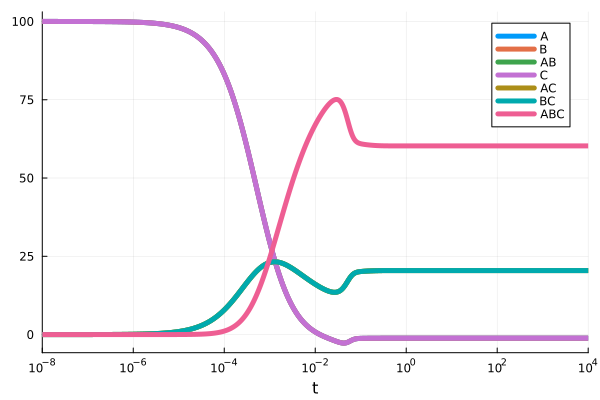

In [27]:
ode = ODEProblem(trimer, u0, (.00000001,10000), [:k1=>9.90713276500075, :k2=>0.6472953801739775, :k3=>9.903051890889062, :k4=>-3.8842054380909286])#; jac = true) #Using the jacobian
sol = solve(ode,Rodas5P())
plot(sol,xaxis=:log; lw = 5)

In [ ]:
println(sol.u[end])
println(sol.u[end][end])

In [ ]:
println(sol.u)

In [3]:
using Flux
forward_rates = [50.0,50.0]
lr = .01
sum(relu.((10*lr).-forward_rates)) + sum(relu.(forward_rates.-10)) 

80.0

In [ ]:
#print(rn)
include("./optim.jl")